# Approximation of Function with ANN


## Loading Dependencies

In [2]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np

## Example Data

In [215]:
sample_size = 5000

In [216]:
x = np.random.random(sample_size)
def f(x):
    return np.sin(x**2 +1)
y = f(x)

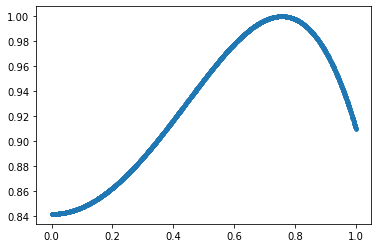

In [217]:
plt.plot(x, y, '.')

In [191]:
def render_history(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history.history["mean_absolute_error"], label="mean_absolute_error")
    plt.plot(history.history["val_mean_absolute_error"], label="val_mean_absolute_error")
    plt.legend()
    plt.show()
    plt.close()

In [211]:
model = models.Sequential()

model.add(layers.InputLayer(1))
model.add(layers.Dense(8, activation="linear"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(8, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 8)                 16        
                                                                 
 dense_76 (Dense)            (None, 8)                 72        
                                                                 
 dense_77 (Dense)            (None, 8)                 72        
                                                                 
 dense_78 (Dense)            (None, 1)                 9         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(
    loss="mean_squared_error",
    metrics=["mean_absolute_error"],
    optimizer="adam"
)

Epoch 1/5
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0082 - mean_absolute_error: 0.0495 - val_loss: 6.4643e-04 - val_mean_absolute_error: 0.0222
Epoch 2/5
1250/1250 [==============================] - 1s 1ms/step - loss: 4.7992e-04 - mean_absolute_error: 0.0174 - val_loss: 3.5868e-04 - val_mean_absolute_error: 0.0137
Epoch 3/5
1250/1250 [==============================] - 1s 1ms/step - loss: 3.2599e-04 - mean_absolute_error: 0.0122 - val_loss: 3.0112e-04 - val_mean_absolute_error: 0.0109
Epoch 4/5
1250/1250 [==============================] - 1s 1ms/step - loss: 2.9572e-04 - mean_absolute_error: 0.0103 - val_loss: 2.8656e-04 - val_mean_absolute_error: 0.0099
Epoch 5/5
1250/1250 [==============================] - 1s 1ms/step - loss: 2.8337e-04 - mean_absolute_error: 0.0096 - val_loss: 2.7354e-04 - val_mean_absolute_error: 0.0094


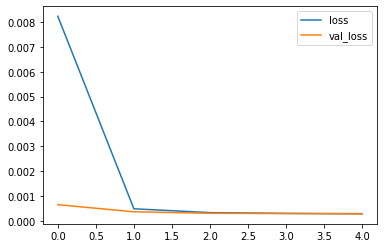

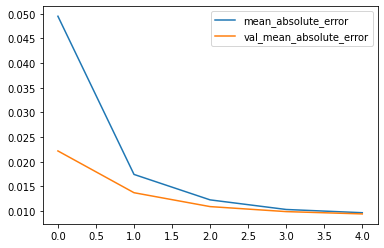

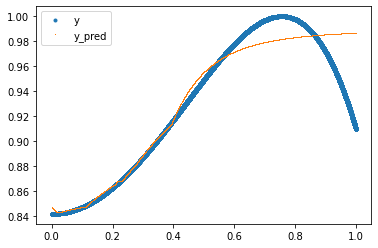

In [213]:
history = model.fit(
    x,
    y,
    epochs=5,
    validation_split=0.2,
)

render_history(history)
y_pred = model.predict(x)
plt.plot(x, y, '.', label="y")
plt.plot(x, y_pred, ',', label="y_pred")
plt.legend()
plt.show()